Epoch1/20,Loss:0.9768763269782066
Epoch2/20,Loss:0.9498056225776672
Epoch3/20,Loss:0.9360807610154152
Epoch4/20,Loss:0.9275293816328049
Epoch5/20,Loss:0.9215973397493362
Epoch6/20,Loss:0.9171932610273361
Epoch7/20,Loss:0.9137804908752442
Epoch8/20,Loss:0.9110536429286004
Epoch9/20,Loss:0.9088260288834572
Epoch10/20,Loss:0.906974034011364
Epoch11/20,Loss:0.905414613366127
Epoch12/20,Loss:0.9040876784324646
Epoch13/20,Loss:0.902949408710003
Epoch14/20,Loss:0.9019663573503495
Epoch15/20,Loss:0.901112798511982
Epoch16/20,Loss:0.9003679938912391
Epoch17/20,Loss:0.8997155367136002
Epoch18/20,Loss:0.8991424788832665
Epoch19/20,Loss:0.8986370642185211
Epoch20/20,Loss:0.898190611243248


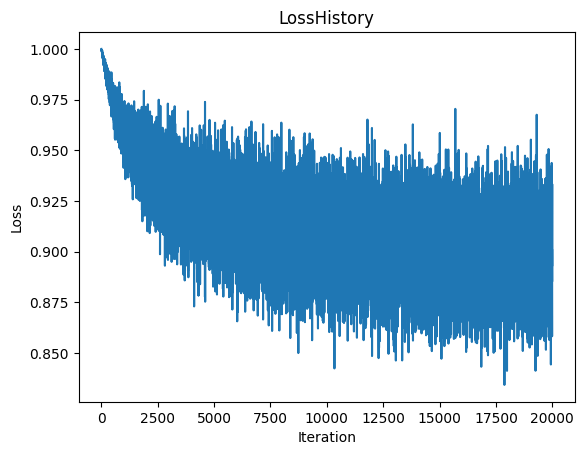

Trainingaccuracy:32.21%
Testaccuracy:32.39%


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
#1.Dataloading
transform=transforms.Compose(
[transforms.ToTensor(),
transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
batch_size=50
trainset=torchvision.datasets.CIFAR10(root='./data',train=True,download=False,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True,num_workers=2)
testset=torchvision.datasets.CIFAR10(root='./data',train=False ,download=False , transform=transform )
testloader=torch.utils.data.DataLoader(testset,batch_size=batch_size,shuffle=False,num_workers=2)
classes=('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')
#2.Define Network Parameters
Din=3*32*32 # Inputsize(flattenedCIFAR=10imagesize)
K=10 #Outputsize (numberofclassesinCIFAR=10)
std=1e-5
#Initialize weights and biases
w=torch.randn(Din,K)*std #Onelayer:directlymapinputtooutput
b=torch.zeros(K)
#Hyperparameters
iterations=20
lr= 2e-6 #Learningrate
lr_decay=0.9#Learningratedecay
reg=0#Regularization
loss_history=[]
#3.TrainingLoop
for t in range(iterations):
    running_loss=0.0
    for i,data in enumerate(trainloader,0):
        #Getinputsandlabels
        inputs,labels=data
        Ntr=inputs.shape[0]#Batchsize
        x_train=inputs.view(Ntr,-1)#Flatteninputto(Ntr,Din)
        y_train_onehot=nn.functional.one_hot(labels,K).float()#Convertlabelstoone=h
        #Forwardpass
        y_pred=x_train.mm(w)+b#Outputlayeractivation
        #Loss calculation(MeanSquaredErrorwithregularization)
        loss=(1/Ntr)*torch.sum((y_pred-y_train_onehot)**2)+reg*torch.sum(w**2)
        loss_history.append(loss.item())
        running_loss+=loss.item()
        #Backpropagation
        dy_pred=(2.0/Ntr)*(y_pred-y_train_onehot)
        dw=x_train.t().mm(dy_pred)+reg*w
        db=dy_pred.sum(dim=0)
        #Parameterupdate
        w-=lr*dw
        b-=lr*db
        #Printlossforeveryepoch
    if t%1==0:
        print(f"Epoch{t+1}/{iterations},Loss:{running_loss/len(trainloader)}")
    #Learningratedecay
    lr*=lr_decay
#4.PlottingtheLossHistory
plt.plot(loss_history)
plt.title("LossHistory")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()
#5.CalculateAccuracyonTrainingSet
correct_train=0
total_train=0
with torch.no_grad():
    for data in trainloader:
        inputs,labels=data
        Ntr=inputs.shape[0]
        x_train=inputs.view(Ntr,-1)
        y_train_onehot=nn.functional.one_hot(labels,K).float()
        #Forwardpass
        y_train_pred=x_train.mm(w)+b
        predicted_train=torch.argmax(y_train_pred,dim=1)
        total_train+=labels.size(0)
        correct_train+=(predicted_train==labels).sum().item()
train_acc=100*correct_train/total_train
print(f"Trainingaccuracy:{train_acc:.2f}%")
#6.CalculateAccuracyonTestSet
correct_test=0
total_test=0
with torch.no_grad():
    for data in testloader:
        inputs,labels=data
        Nte=inputs.shape[0]
        x_test=inputs.view(Nte,-1)
        y_test_onehot=nn.functional.one_hot(labels,K).float()
        #Forwardpass
        y_test_pred=x_test.mm(w)+b
        predicted_test=torch.argmax(y_test_pred,dim=1)
        total_test+=labels.size(0)
        correct_test+=(predicted_test==labels).sum().item()
test_acc=100*correct_test/total_test
print(f"Testaccuracy:{test_acc:.2f}%")

Epoch : 1/20,Loss : 0.9902700492739678
Epoch : 2/20,Loss : 0.9740576912760734
Epoch : 3/20,Loss : 0.9619735755324363
Epoch : 4/20,Loss : 0.9527945904135704
Epoch : 5/20,Loss : 0.9457027670741082
Epoch : 6/20,Loss : 0.9401389698386192
Epoch : 7/20,Loss : 0.9357135435342788
Epoch : 8/20,Loss : 0.9321497375369072
Epoch : 9/20,Loss : 0.9292476071715355
Epoch : 10/20,Loss : 0.9268605529665946
Epoch : 11/20,Loss : 0.9248793295025826
Epoch : 12/20,Loss : 0.9232215955853462
Epoch : 13/20,Loss : 0.9218243365883827
Epoch : 14/20,Loss : 0.9206389071941375
Epoch : 15/20,Loss : 0.9196272031664848
Epoch : 16/20,Loss : 0.9187591635584831
Epoch : 17/20,Loss : 0.9180108495354652
Epoch : 18/20,Loss : 0.9173629321455955
Epoch : 19/20,Loss : 0.9167998096346855
Epoch : 20/20,Loss : 0.9163086076378822


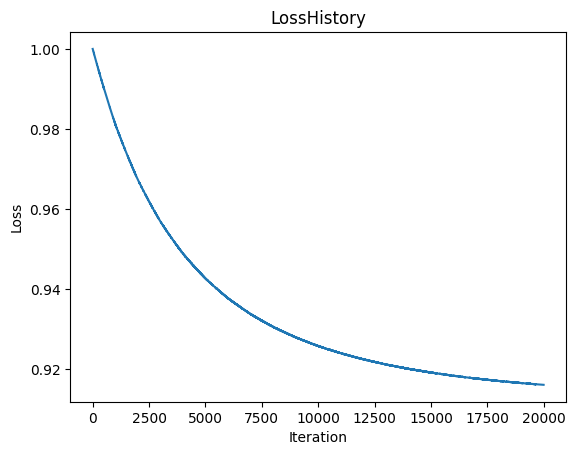

Trainingaccuracy:1.74%
Testaccuracy:1.75%


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
#1.Dataloading
transform=transforms.Compose(
[transforms.ToTensor(),
transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
batch_size=50
trainset=torchvision.datasets.CIFAR10(root='./data',train=True,download=False,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True,num_workers=2)
testset=torchvision.datasets.CIFAR10(root='./data',train=False ,download=False , transform=transform )
testloader=torch.utils.data.DataLoader(testset,batch_size=batch_size,shuffle=False,num_workers=2)
classes=('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')
#2.Define Network Parameters
Din=3*32*32 # Inputsize(flattenedCIFAR=10imagesize)
K=10 #Outputsize (numberofclassesinCIFAR=10)
H = 100             # Size of the hidden layer
std=1e-5
# Initialize weights and biases
w1 = torch.randn(Din, H) * std  # Weights for input to hidden layer
b1 = torch.zeros(H)             # Biases for hidden layer
w2 = torch.randn(H, K) * std    # Weights for hidden to output layer
b2 = torch.zeros(K)             # Biases for output layer
#Hyperparameters
iterations=20
lr= 2e-6 #Learningrate
lr_decay=0.9#Learningratedecay
reg=0#Regularization
loss_history=[]
#3.TrainingLoop
for t in range(iterations):
    running_loss=0.0
    for i,data in enumerate(trainloader,0):
        #Getinputsandlabels
        inputs,labels=data
        Ntr=inputs.shape[0]#Batchsize
        x_train=inputs.view(Ntr,-1)#Flatteninputto(Ntr,Din)
        y_train_onehot=nn.functional.one_hot(labels,K).float()#Convertlabelstoone=h
        #Forwardpass
        hidden_layer = torch.sigmoid(x_train.mm(w1) + b1)  # Apply sigmoid activation on hidden layer
        y_pred = hidden_layer.mm(w2) + b2  # Output layer activation
        #Loss calculation(MeanSquaredErrorwithregularization)
        loss = (1 / Ntr) * torch.sum((y_pred - y_train_onehot) ** 2) + reg * (torch.sum(w1 ** 2) + torch.sum(w2 ** 2))
        loss_history.append(loss.item())
        running_loss+=loss.item()
        #Backpropagation
        dy_pred = (2.0 / Ntr) * (y_pred - y_train_onehot)
        dw2 = hidden_layer.t().mm(dy_pred) + reg * w2
        db2 = dy_pred.sum(dim=0)

        dhidden_layer = dy_pred.mm(w2.t()) * hidden_layer * (1 - hidden_layer)  # Gradient of sigmoid
        dw1 = x_train.t().mm(dhidden_layer) + reg * w1
        db1 = dhidden_layer.sum(dim=0)

        # Parameter update
        w2 -= lr * dw2
        b2 -= lr * db2
        w1 -= lr * dw1
        b1 -= lr * db1
        #Printlossforeveryepoch
    if t%1==0:
        print(f"Epoch : {t+1}/{iterations},Loss : {running_loss/len(trainloader)}")
    #Learningratedecay
    lr*=lr_decay
#4.PlottingtheLossHistory
plt.plot(loss_history)
plt.title("LossHistory")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()
#5.CalculateAccuracyonTrainingSet
correct_train=0
total_train=0
with torch.no_grad():
    for data in trainloader:
        inputs,labels=data
        Ntr=inputs.shape[0]
        x_train=inputs.view(Ntr,-1)
        y_train_onehot=nn.functional.one_hot(labels,K).float()
        #Forwardpass
        y_train_pred = x_train.mm(w1) + b1
        predicted_train=torch.argmax(y_train_pred,dim=1)
        total_train+=labels.size(0)
        correct_train+=(predicted_train==labels).sum().item()
train_acc=100*correct_train/total_train
print(f"Trainingaccuracy:{train_acc:.2f}%")
#6.CalculateAccuracyonTestSet
correct_test=0
total_test=0
with torch.no_grad():
    for data in testloader:
        inputs,labels=data
        Nte=inputs.shape[0]
        x_test=inputs.view(Nte,-1)
        y_test_onehot=nn.functional.one_hot(labels,K).float()
        #Forwardpass
        y_test_pred = x_test.mm(w1) + b1
        predicted_test=torch.argmax(y_test_pred,dim=1)
        total_test+=labels.size(0)
        correct_test+=(predicted_test==labels).sum().item()
test_acc=100*correct_test/total_test
print(f"Testaccuracy:{test_acc:.2f}%")

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/10, Loss: 2.050584155201912
Epoch 2/10, Loss: 1.7940382491350173
Epoch 3/10, Loss: 1.7081458842754365
Epoch 4/10, Loss: 1.657094073176384
Epoch 5/10, Loss: 1.618026115655899
Epoch 6/10, Loss: 1.5863447465896607
Epoch 7/10, Loss: 1.556751939892769
Epoch 8/10, Loss: 1.5314404603242875
Epoch 9/10, Loss: 1.5081730649471283
Epoch 10/10, Loss: 1.4865343767404555


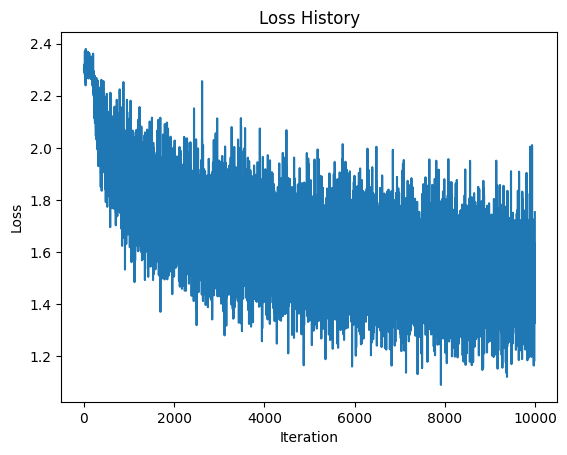

Training accuracy: 49.67%
Test accuracy: 46.28%


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Data Loading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
batch_size = 50
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# 2. Define Network Parameters
Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
H = 100            # Size of the hidden layer
K = 10             # Output size (number of classes in CIFAR-10)
std = 1e-5

# Initialize weights and biases for both layers
w1 = torch.randn(Din, H) * std  # Weights for input to hidden layer
b1 = torch.zeros(H)             # Biases for hidden layer
w2 = torch.randn(H, K) * std    # Weights for hidden to output layer
b2 = torch.zeros(K)             # Biases for output layer

# Hyperparameters
iterations = 10
lr = 2e-3   # Learning rate
lr_decay = 0.9  # Learning rate decay
reg = 0     # Regularization
loss_history = []

# Define Cross-Entropy Loss
criterion = nn.CrossEntropyLoss()

# 3. Training Loop
for t in range(iterations):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        Ntr = inputs.shape[0]  # Batch size
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)

        # Forward pass
        hidden_layer = torch.sigmoid(x_train.mm(w1) + b1)  # Apply sigmoid activation on hidden layer
        y_pred = hidden_layer.mm(w2) + b2  # Output layer activation (logits)

        # Cross-entropy loss (adds regularization)
        loss = criterion(y_pred, labels) + reg * (torch.sum(w1 ** 2) + torch.sum(w2 ** 2))
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Calculate gradients manually for backpropagation
        dy_pred = torch.zeros_like(y_pred)
        dy_pred[range(Ntr), labels] -= 1 / y_pred[range(Ntr), labels].exp().sum()
        dy_pred += y_pred.softmax(dim=1)

        dw2 = hidden_layer.t().mm(dy_pred) + reg * w2
        db2 = dy_pred.sum(dim=0)
        dhidden_layer = dy_pred.mm(w2.t()) * hidden_layer * (1 - hidden_layer)  # Sigmoid gradient
        dw1 = x_train.t().mm(dhidden_layer) + reg * w1
        db1 = dhidden_layer.sum(dim=0)

        # Parameter update
        w2 -= lr * dw2
        b2 -= lr * db2
        w1 -= lr * dw1
        b1 -= lr * db1

    # Print loss for every epoch
    if t % 1 == 0:
        print(f"Epoch {t + 1}/{iterations}, Loss: {running_loss / len(trainloader)}")

    # Learning rate decay
    lr *= lr_decay

# 4. Plot Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)
        hidden_layer = torch.sigmoid(x_train.mm(w1) + b1)
        y_train_pred = hidden_layer.mm(w2) + b2
        predicted_train = torch.argmax(y_train_pred, dim=1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()
train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)
        hidden_layer = torch.sigmoid(x_test.mm(w1) + b1)
        y_test_pred = hidden_layer.mm(w2) + b2
        predicted_test = torch.argmax(y_test_pred, dim=1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()
test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")


Epoch 1/10, Loss: 2.269529327146534
Epoch 2/10, Loss: 0.6980860740708899
Epoch 3/10, Loss: 0.32021952016966176
Epoch 4/10, Loss: 0.2437988262710922
Epoch 5/10, Loss: 0.1968247691101865
Epoch 6/10, Loss: 0.16531458284173692
Epoch 7/10, Loss: 0.1415590293415542
Epoch 8/10, Loss: 0.124812055231213
Epoch 9/10, Loss: 0.10906734645489786
Epoch 10/10, Loss: 0.098138864916652
Finished Training
Training Accuracy: 97.34%
Test Accuracy: 97.39%


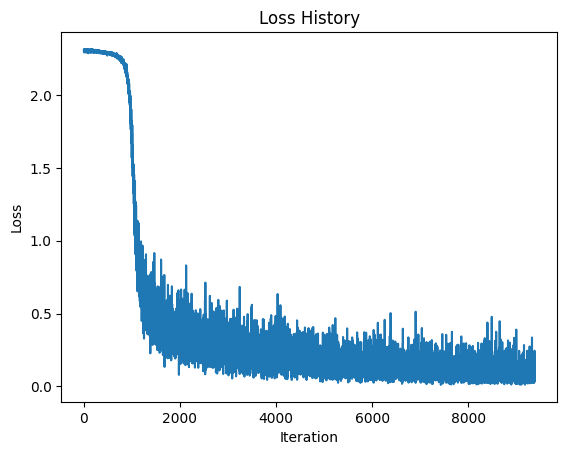

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Load and Preprocess the MNIST Dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to mean 0.5, std 0.5 for single-channel images
])

batch_size = 64

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# 2. Define the LeNet-5 Network
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        # Define layers according to LeNet-5 architecture
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)  # 1 input channel, 6 output channels, 5x5 kernel
        self.pool = nn.AvgPool2d(2, stride=2)        # Average Pooling layer
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5) # 6 input channels, 16 output channels
        self.fc1 = nn.Linear(16 * 4 * 4, 120)        # Fully connected layer
        self.fc2 = nn.Linear(120, 84)                # Fully connected layer
        self.fc3 = nn.Linear(84, 10)                 # Final output layer (10 classes for MNIST)

    def forward(self, x):
        # Forward pass
        x = self.pool(torch.relu(self.conv1(x)))     # Conv1 -> ReLU -> Pool
        x = self.pool(torch.relu(self.conv2(x)))     # Conv2 -> ReLU -> Pool
        x = x.view(-1, 16 * 4 * 4)                   # Flatten for fully connected layers
        x = torch.relu(self.fc1(x))                  # Fully connected -> ReLU
        x = torch.relu(self.fc2(x))                  # Fully connected -> ReLU
        x = self.fc3(x)                              # Output layer
        return x

# 3. Initialize the Network, Loss Function, and Optimizer
net = LeNet5()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# 4. Train the Network
num_epochs = 10
loss_history = []
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        loss_history.append(loss.item())
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / len(trainloader)}")

print("Finished Training")

# 5. Calculate Training Accuracy
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
train_accuracy = 100 * correct_train / total_train
print(f"Training Accuracy: {train_accuracy:.2f}%")

# 6. Calculate Test Accuracy
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()
test_accuracy = 100 * correct_test / total_test
print(f"Test Accuracy: {test_accuracy:.2f}%")

# 7. Plot Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()


Epoch [1/10], Step [400/938], Loss: 0.0627
Epoch [1/10], Step [800/938], Loss: 0.1123
Epoch [2/10], Step [400/938], Loss: 0.0659
Epoch [2/10], Step [800/938], Loss: 0.0389
Epoch [3/10], Step [400/938], Loss: 0.0490
Epoch [3/10], Step [800/938], Loss: 0.0074
Epoch [4/10], Step [400/938], Loss: 0.0419
Epoch [4/10], Step [800/938], Loss: 0.0041
Epoch [5/10], Step [400/938], Loss: 0.0341
Epoch [5/10], Step [800/938], Loss: 0.0124
Epoch [6/10], Step [400/938], Loss: 0.0008
Epoch [6/10], Step [800/938], Loss: 0.0098
Epoch [7/10], Step [400/938], Loss: 0.0638
Epoch [7/10], Step [800/938], Loss: 0.0047
Epoch [8/10], Step [400/938], Loss: 0.0170
Epoch [8/10], Step [800/938], Loss: 0.0007
Epoch [9/10], Step [400/938], Loss: 0.0009
Epoch [9/10], Step [800/938], Loss: 0.0135
Epoch [10/10], Step [400/938], Loss: 0.0018
Epoch [10/10], Step [800/938], Loss: 0.0004


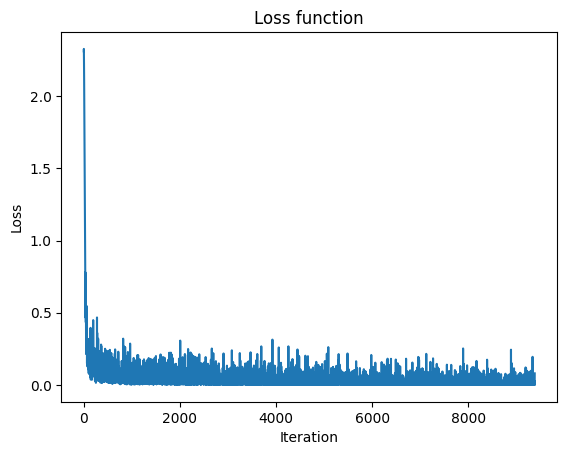

In [23]:
# Load in relevant libraries, and alias where appropriate
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define relevant variables for the ML task
batch_size = 64
num_classes = 10
learning_rate = 0.001
num_epochs = 10

# Device will determine whether to run the training on GPU or CPU.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Loading the dataset and preprocessing
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transforms.Compose([
                                               transforms.Resize((32, 32)),
                                               transforms.ToTensor(),
                                               transforms.Normalize(mean=(0.1307,), std=(0.3081,))
                                           ]),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=transforms.Compose([
                                              transforms.Resize((32, 32)),
                                              transforms.ToTensor(),
                                              transforms.Normalize(mean=(0.1325,), std=(0.3105,))
                                          ]),
                                          download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

# Defining the convolutional neural network
class LeNet5(nn.Module):
    def __init__(self, num_classes):
        super(LeNet5, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(6),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(400, 120)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(120, 84)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(84, num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.relu(out)
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out


model = LeNet5(num_classes).to(device)

# Setting the loss function
cost = nn.CrossEntropyLoss()

# Setting the optimizer with the model parameters and learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# This is defined to print how many steps are remaining when training
total_step = len(train_loader)

# List to store loss values
loss_history = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = cost(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Store loss value
        loss_history.append(loss.item())

        if (i + 1) % 400 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))

# Plot the loss function
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss function')
plt.show()

In [24]:
# Test the model
    # In test phase, we don't need to compute gradients (for memory efficiency)
    
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the network on the 10000 test images: 98.94 %


New tesing code with new architecture

Epoch 1/10, Loss: 1.6894116024218642
Epoch 2/10, Loss: 0.5033952188390151
Epoch 3/10, Loss: 0.34162581495956573
Epoch 4/10, Loss: 0.2763469679428062
Epoch 5/10, Loss: 0.23250963549608233
Epoch 6/10, Loss: 0.19923551011282498
Epoch 7/10, Loss: 0.17355857093308144
Epoch 8/10, Loss: 0.15311069520059298
Epoch 9/10, Loss: 0.136950346762374
Epoch 10/10, Loss: 0.12453400667137238
Finished Training
Training Accuracy: 96.56%
Test Accuracy: 96.63%


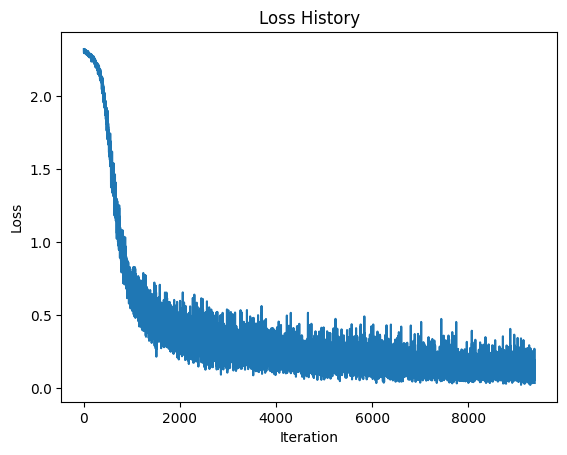

In [26]:
import torch
from torch import nn, optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Load and Preprocess the MNIST Dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to mean 0.5, std 0.5 for single-channel images
])

batch_size = 64

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# 2. Define the LeNet-5 Network as provided
class LeNet5V1(nn.Module):
    def __init__(self):
        super().__init__()
        self.feature = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=2),  # 28*28 -> 32*32 -> 28*28
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2),  # 14*14

            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),  # 10*10
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2),  # 5*5
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=16*5*5, out_features=120),
            nn.Tanh(),
            nn.Linear(in_features=120, out_features=84),
            nn.Tanh(),
            nn.Linear(in_features=84, out_features=10),
        )

    def forward(self, x):
        return self.classifier(self.feature(x))

# Initialize the network, loss function, and optimizer
net = LeNet5V1()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# 3. Train the Network
num_epochs = 10
loss_history = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        loss_history.append(loss.item())
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / len(trainloader)}")
print("Finished Training")

# 4. Calculate Training Accuracy
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
train_accuracy = 100 * correct_train / total_train
print(f"Training Accuracy: {train_accuracy:.2f}%")

# 5. Calculate Test Accuracy
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()
test_accuracy = 100 * correct_test / total_test
print(f"Test Accuracy: {test_accuracy:.2f}%")

# 6. Plot Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()


### Part 3

cuda:0


c:\Users\nidul\.conda\envs\zs6d\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\nidul\.conda\envs\zs6d\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Fine-tuning all layers:
Epoch 1/10
----------
train Loss: 0.7789 Acc: 0.6352
val Loss: 0.2874 Acc: 0.8824
Epoch 2/10
----------
train Loss: 0.5789 Acc: 0.7705
val Loss: 0.3092 Acc: 0.8693
Epoch 3/10
----------
train Loss: 0.4523 Acc: 0.8525
val Loss: 0.2805 Acc: 0.9216
Epoch 4/10
----------
train Loss: 0.6811 Acc: 0.7664
val Loss: 0.5074 Acc: 0.8497
Epoch 5/10
----------
train Loss: 0.6753 Acc: 0.7951
val Loss: 0.3034 Acc: 0.8889
Epoch 6/10
----------
train Loss: 0.4926 Acc: 0.8074
val Loss: 0.4445 Acc: 0.8562
Epoch 7/10
----------
train Loss: 0.3944 Acc: 0.8320
val Loss: 0.2910 Acc: 0.9085
Epoch 8/10
----------
train Loss: 0.3275 Acc: 0.8525
val Loss: 0.2615 Acc: 0.9216
Epoch 9/10
----------
train Loss: 0.3544 Acc: 0.8730
val Loss: 0.2463 Acc: 0.9085
Epoch 10/10
----------
train Loss: 0.3426 Acc: 0.8525
val Loss: 0.2380 Acc: 0.9216
Training complete in 1m 46s
Best val Acc: 0.9216

Feature extraction (only final layer is trainable):
Epoch 1/10
----------
train Loss: 0.6159 Acc: 0.6926


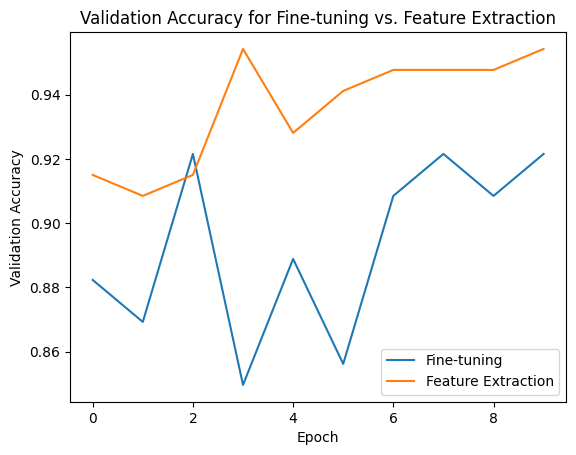

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, models
import matplotlib.pyplot as plt
import numpy as np
import time

# 1. Data Loading and Preprocessing
# Define transformations for the training and validation sets
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Path to the data folder
data_dir = './hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(root=f"{data_dir}/{x}", transform=data_transforms[x]) for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=2) for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# 2. Define Function for Training and Evaluation
def train_model(model, criterion, optimizer, scheduler, num_epochs=10):
    since = time.time()
    best_model_wts = model.state_dict()
    best_acc = 0.0
    loss_history, acc_history = [], []

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()

            if phase == 'val':
                loss_history.append(epoch_loss)
                acc_history.append(epoch_acc.item())

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:.4f}')

    model.load_state_dict(best_model_wts)
    return model, loss_history, acc_history

# 3. Fine-Tuning All Layers
# Load pre-trained ResNet-18 and modify the final layer
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)
model_ft = model_ft.to(device)

# Define loss function, optimizer, and learning rate scheduler
criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

# Train and evaluate the fine-tuning model
print("Fine-tuning all layers:")
model_ft, ft_loss_history, ft_acc_history = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=10)

# 4. Feature Extraction
# Load pre-trained ResNet-18, freeze all layers except the final one
model_conv = models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)
model_conv = model_conv.to(device)

# Define optimizer and learning rate scheduler for feature extraction
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler_conv = optim.lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

# Train and evaluate the feature extraction model
print("\nFeature extraction (only final layer is trainable):")
model_conv, conv_loss_history, conv_acc_history = train_model(model_conv, criterion, optimizer_conv, exp_lr_scheduler_conv, num_epochs=10)

# 5. Plot Training and Validation Accuracy
plt.plot(ft_acc_history, label='Fine-tuning')
plt.plot(conv_acc_history, label='Feature Extraction')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy for Fine-tuning vs. Feature Extraction')
plt.legend()
plt.show()
